In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Renewable_Energy_Usage_Sampled.csv')

**I. LỌC DỮ LIỆU**

In [ ]:
df.shape


(1000, 12)

In [ ]:
df.head()


,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


==> Có thể loại bỏ cột dữ liệu về Household_ID

In [ ]:
df=df[[#'Household_ID',
    'Region', 'Country', 'Energy_Source',
       'Monthly_Usage_kWh', 'Year', 'Household_Size', 'Income_Level',
       'Urban_Rural', 'Adoption_Year', 'Subsidy_Received', 'Cost_Savings_USD']].copy()

In [ ]:
df.describe(include='all')

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,1000,6,25,5,NaN,NaN,NaN,3,2,NaN,2,NaN
top,H01502,Europe,Australia,Wind,NaN,NaN,NaN,Middle,Rural,NaN,No,NaN
freq,1,173,84,227,NaN,NaN,NaN,358,514,NaN,503,NaN
mean,NaN,NaN,NaN,NaN,767.325530,2021.992000,4.480000,NaN,NaN,2015.992000,NaN,248.389850
std,NaN,NaN,NaN,NaN,419.649102,1.419137,2.297581,NaN,NaN,3.973629,NaN,143.127301
min,NaN,NaN,NaN,NaN,50.740000,2020.000000,1.000000,NaN,NaN,2010.000000,NaN,10.420000
25%,NaN,NaN,NaN,NaN,402.730000,2021.000000,2.000000,NaN,NaN,2013.000000,NaN,122.122500
50%,NaN,NaN,NaN,NaN,760.190000,2022.000000,5.000000,NaN,NaN,2016.000000,NaN,242.530000
75%,NaN,NaN,NaN,NaN,1117.747500,2023.000000,6.000000,NaN,NaN,2019.000000,NaN,372.520000


In [ ]:
df.isna().sum()

,0
Region,0
Country,0
Energy_Source,0
Monthly_Usage_kWh,0
Year,0
Household_Size,0
Income_Level,0
Urban_Rural,0
Adoption_Year,0
Subsidy_Received,0


==> Không có dữ liệu thừa


**II. EDA**

1. Phân tích Đơn biến (univariate analysis)

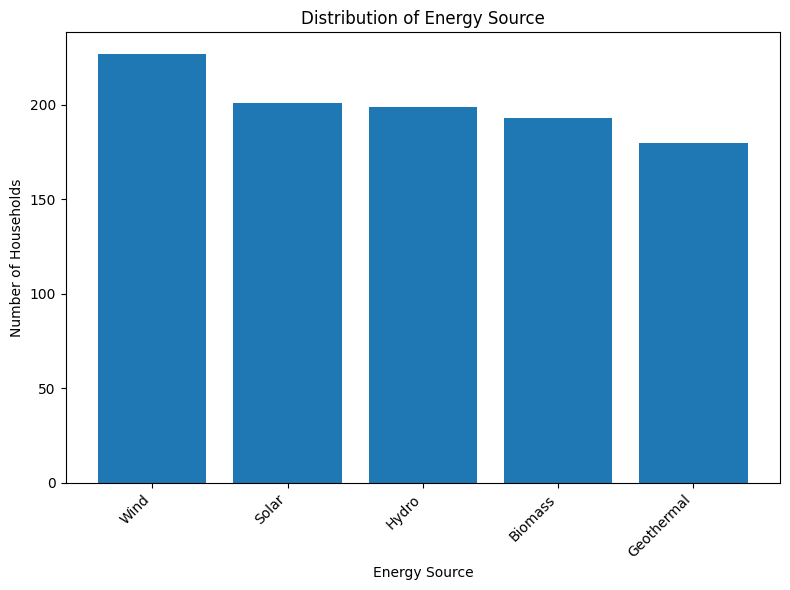

Phân phối theo Energy_Source
Wind          227
Solar         201
Hydro         199
Biomass       193
Geothermal    180
Name: count, dtype: int64
 ==> Wind được sử dụng nhiều nhất, Geothermal thấp nhất, còn lại gần như bằng nhau
 ==> sự phổ biến của loại năng lượng gió và mặt trời


In [ ]:
energy_source_counts = df['Energy_Source'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(energy_source_counts.index, energy_source_counts.values)
plt.title('Distribution of Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Phân phối theo", energy_source_counts)
print(" ==> Wind được sử dụng nhiều nhất, Geothermal thấp nhất, còn lại gần như bằng nhau")
print(" ==> Sự phổ biến của loại năng lượng gió và mặt trời")

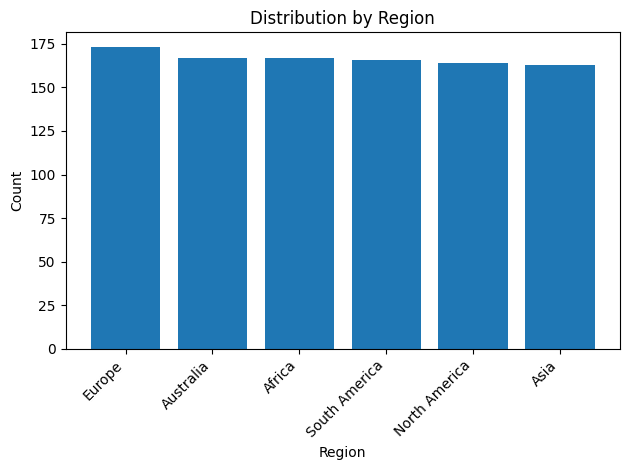

Phân phối theo Region
Europe           173
Australia        167
Africa           167
South America    166
North America    164
Asia             163
Name: count, dtype: int64
==> Gần tương tự nhau


In [ ]:
counts = df['Region'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Phân phối theo", counts)
print("==> Gần tương tự nhau")

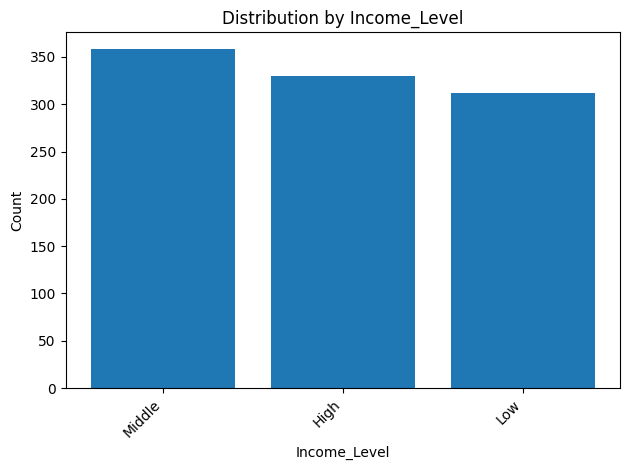

Phân phối theo Income_Level
Middle    358
High      330
Low       312
Name: count, dtype: int64
==> Middle > High > Low


In [ ]:
counts = df['Income_Level'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Income_Level')
plt.xlabel('Income_Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Phân phối theo", counts)
print("==> Middle > High > Low")

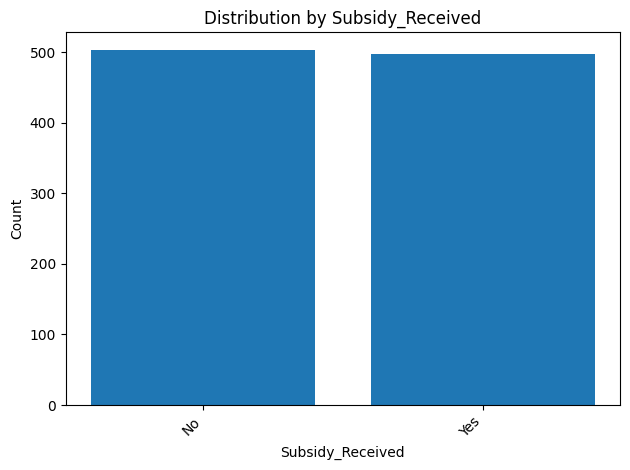

Phân phối theo  Subsidy_Received
No     503
Yes    497
Name: count, dtype: int64
 ==> Khá là cân bằng


In [ ]:
counts = df['Subsidy_Received'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Subsidy_Received')
plt.xlabel('Subsidy_Received')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Phân phối theo ", counts)
print(" ==> Khá là cân bằng")

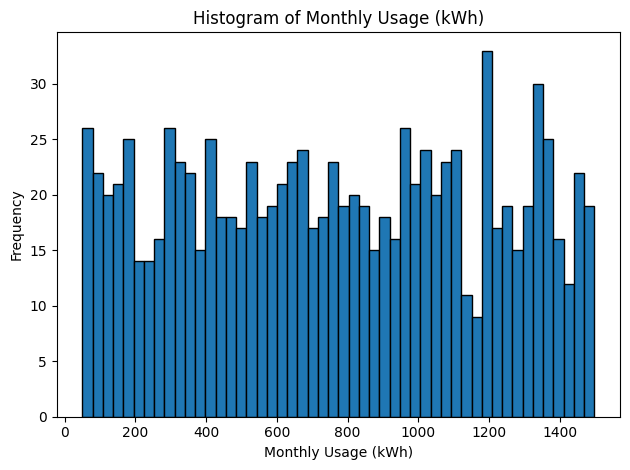

Thống kê mô tả cho Monthly Usage (kWh):
 count    1000.000000
mean      767.325530
std       419.649102
min        50.740000
25%       402.730000
50%       760.190000
75%      1117.747500
max      1497.340000
Name: Monthly_Usage_kWh, dtype: float64
Không có dạng chuẩn, cũng không quá lệch về hướng nào đó (Hơi lệch phải)
==> Phân tán rộng, không đồng đều, có xu hướng dùng nhiều hơn


In [ ]:
plt.figure()

plt.hist(df['Monthly_Usage_kWh'].dropna(), bins=50, edgecolor='black')
plt.title('Histogram of Monthly Usage (kWh)')
plt.xlabel('Monthly Usage (kWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Thống kê mô tả cho Monthly Usage (kWh):\n", df['Monthly_Usage_kWh'].describe())
print("Không có dạng chuẩn, cũng không quá lệch về hướng nào đó (Hơi lệch phải)")
print("==> Phân tán rộng, không đồng đều, có xu hướng dùng nhiều hơn")

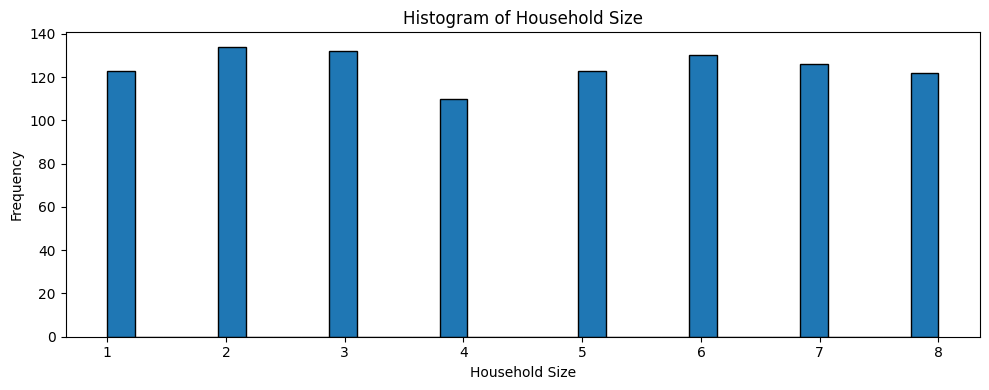

Thống kê mô tả cho Household_Size:
 count    1000.000000
mean        4.480000
std         2.297581
min         1.000000
25%         2.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: Household_Size, dtype: float64
Tỉ lệ khá cân đối, số hộ gia đình có từ 2-3 người sử dụng renewable energy là đông nhất


In [ ]:
plt.figure(figsize=(10, 4))

plt.hist(df['Household_Size'].dropna(), bins=30,edgecolor='black')
plt.title('Histogram of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Thống kê mô tả cho Household_Size:\n", df['Household_Size'].describe())
print("Tỉ lệ khá cân đối, số hộ gia đình có từ 2-3 người sử dụng renewable energy là đông nhất")

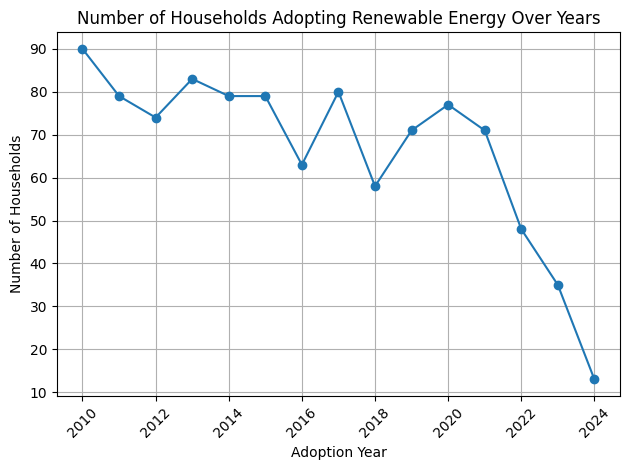

Số hộ áp dụng Renewable Energy (sắp xếp theo năm):
 Adoption_Year
2010    90
2011    79
2012    74
2013    83
2014    79
2015    79
2016    63
2017    80
2018    58
2019    71
2020    77
2021    71
2022    48
2023    35
2024    13
Name: count, dtype: int64
==> Ngày càng giảm


In [ ]:
adoption_year_counts = df['Adoption_Year'].value_counts().sort_index()
plt.figure()
plt.plot(adoption_year_counts.index, adoption_year_counts.values, marker='o')
plt.title('Number of Households Adopting Renewable Energy Over Years')
plt.xlabel('Adoption Year')
plt.ylabel('Number of Households')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Số hộ áp dụng Renewable Energy (sắp xếp theo năm):\n", adoption_year_counts)
print("==> Ngày càng giảm")

**3. Phân tích đa biến (Multivariate Analysis)**

<Figure size 640x480 with 0 Axes>

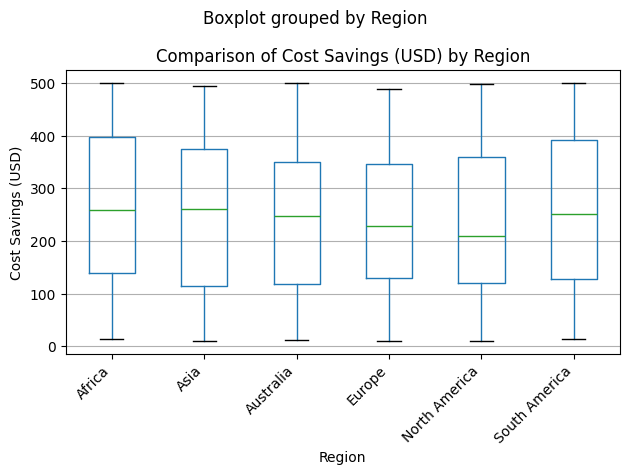

Mức tiết kiệm trung bình theo Vùng:
                count        mean         std    min       25%     50%  \
Region                                                                  
Africa         167.0  259.135030  149.718802  14.19  139.9800  259.85   
Asia           163.0  252.629939  143.927525  10.46  113.7950  261.48   
Australia      167.0  243.535269  140.537335  12.59  119.2450  247.10   
Europe         173.0  240.958671  135.241274  11.02  130.6200  228.95   
North America  164.0  232.357744  142.322109  10.42  119.4525  209.16   
South America  166.0  261.883795  146.758914  13.63  128.2900  251.61   

                    75%     max  
Region                           
Africa         397.4100  499.83  
Asia           374.1900  495.07  
Australia      350.6950  499.53  
Europe         346.2700  489.73  
North America  360.3100  498.90  
South America  392.8275  499.31  


In [ ]:
plt.figure()
df.boxplot(column='Cost_Savings_USD', by='Region')
plt.grid(axis='x')
plt.title('Comparison of Cost Savings (USD) by Region')
plt.xlabel('Region')
plt.ylabel('Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Mức tiết kiệm trung bình theo Vùng:\n", df.groupby('Region')['Cost_Savings_USD'].describe())

**Một số nhận xét**
- Các khu vực đều có phân phối tương đối giống nhau
- Trung vị khá ổn định (Africa, Asia cao hơn, North America thấp nhất)
- Có khoảng IQR (25% - 75%) khá lớn --> Mức độ phân tán cao
- South America có trung bình cao, cao  --> Có hiệu quả tiết kiệm tốt nhất
- North America --> Ít tiết kiệm năng lượng (hoặc ít người dùng)

<Figure size 640x480 with 0 Axes>

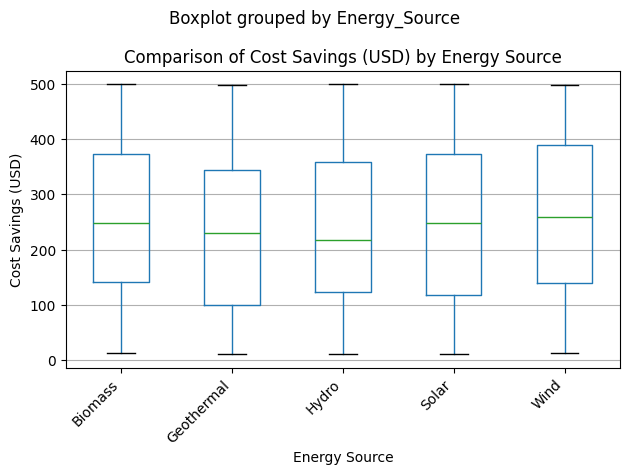

Mức tiết kiệm trung bình theo Loại Năng Lượng:
                count        mean         std    min       25%      50%  \
Energy_Source                                                            
Biomass        193.0  257.462176  140.531474  12.59  141.1800  247.390   
Geothermal     180.0  230.052111  145.698974  10.42  100.5325  229.595   
Hydro          199.0  237.010804  141.774036  10.46  122.5800  218.310   
Solar          201.0  254.123383  143.513683  11.02  118.4900  249.050   
Wind           227.0  260.115947  143.197576  13.63  139.0950  259.300   

                   75%     max  
Energy_Source                   
Biomass        373.550  499.31  
Geothermal     344.835  499.12  
Hydro          358.330  499.53  
Solar          372.640  499.83  
Wind           389.325  498.90  


In [ ]:
plt.figure()
df.boxplot(column='Cost_Savings_USD', by='Energy_Source')
plt.grid(axis='x')
plt.title('Comparison of Cost Savings (USD) by Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Mức tiết kiệm trung bình theo Loại Năng Lượng:\n", df.groupby('Energy_Source')['Cost_Savings_USD'].describe())

- Wind & Solar có trung vị cao nhất (Geothermal thấp nhất)
- Wind có xu hướng tiết kiệm cao hơn, ổn định hơn
- Khá đồng đều
Phân tích từng cái:
a) Wind
- Ổn định, ít giá trị cực thấp
- Hiệu quả tiết kiệm cao nhất

b) Solar
- Hiệu quả gần tương đương Wind
- Phổ biến, hiệu quả tiết kiệm cao

c) Geothermal
- Trung bình thấp

d) Hydro
- Dữ liệu nghiêng trái --> nhiều giá trị thấp

e) Biomass
- Ổn định

<Figure size 800x600 with 0 Axes>

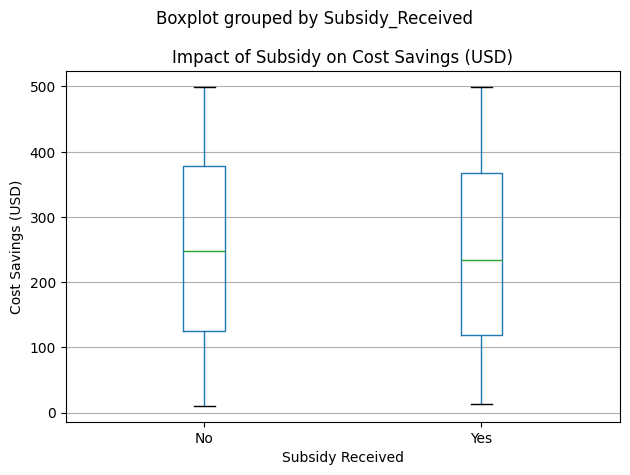

                  count        mean         std    min      25%     50%  \
Subsidy_Received                                                          
No                503.0  251.463101  146.107664  10.42  124.955  248.47   
Yes               497.0  245.279497  140.124945  12.59  119.190  233.34   

                     75%     max  
Subsidy_Received                  
No                378.49  499.83  
Yes               367.33  498.90  


In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Cost_Savings_USD', by='Subsidy_Received')
plt.grid(axis='x')
plt.title('Impact of Subsidy on Cost Savings (USD)')
plt.xlabel('Subsidy Received')
plt.ylabel('Cost Savings (USD)')
plt.tight_layout()
plt.show()
print(df.groupby('Subsidy_Received')['Cost_Savings_USD'].describe())

- Nhóm không nhận trợ cấp, có trung bình tiết kiệm cao hơn nhóm có trợ cấp
- Có trợ cấp nghiêng về phía các giá trị thấp
--> trợ cấp có thể ưu tiên các hộ có nhu cầu thấp
--> Không nhận được đầu tư nên tiết kiệm hơn

<Figure size 640x480 with 0 Axes>

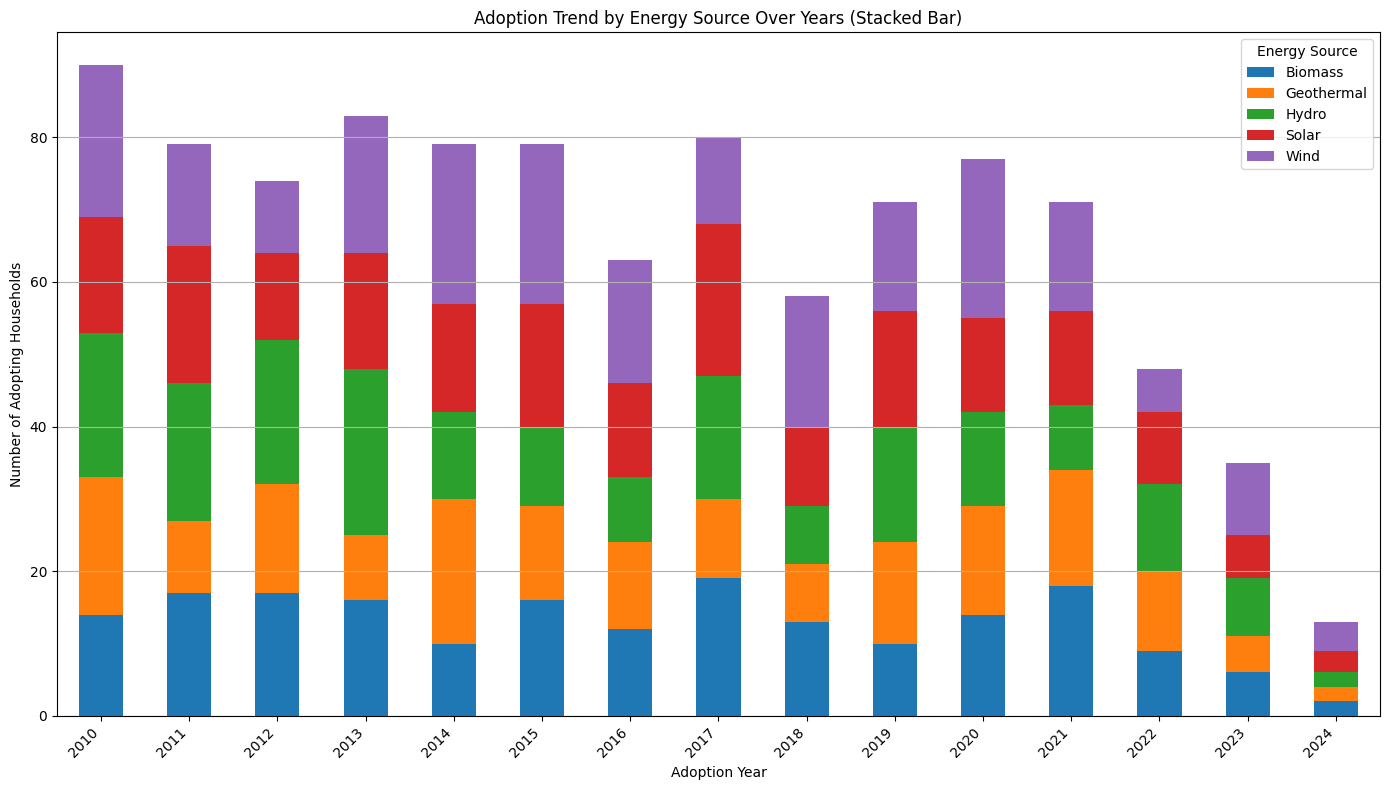

Số hộ áp dụng theo loại năng lượng và năm:
 Energy_Source  Biomass  Geothermal  Hydro  Solar  Wind
Adoption_Year                                         
2020                14          15     13     13    22
2021                18          16      9     13    15
2022                 9          11     12     10     6
2023                 6           5      8      6    10
2024                 2           2      2      3     4


In [ ]:
adoption_by_source_year = pd.crosstab(df['Adoption_Year'], df['Energy_Source'])
plt.figure()
adoption_by_source_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Adoption Trend by Energy Source Over Years (Stacked Bar)')
plt.xlabel('Adoption Year')
plt.ylabel('Number of Adopting Households')
plt.legend(title='Energy Source')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("Số hộ áp dụng theo loại năng lượng và năm:\n", adoption_by_source_year.tail())

Có sự suy giảm mạnh mẽ trong việc (mới) sử dụng nguồn năng lượng tái tạo

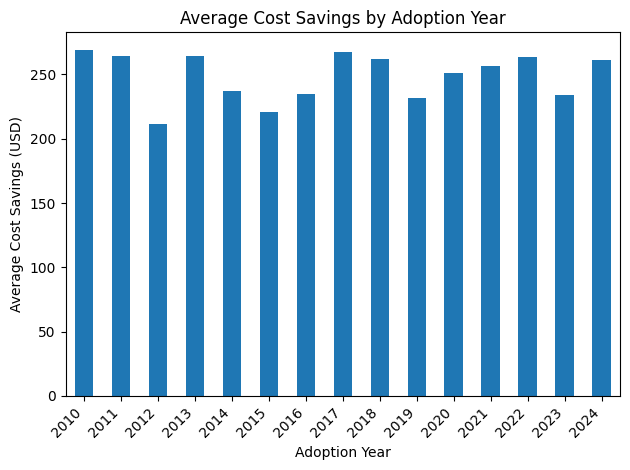

Mức tiết kiệm trung bình theo năm áp dụng:
 Adoption_Year
2012    211.470946
2015    220.376329
2019    231.863662
2023    233.877714
2016    234.995556
2014    236.928101
2020    250.722078
2021    256.471127
2024    261.339231
2018    261.655862
2022    263.526250
2013    264.136386
2011    264.191519
2017    267.455250
2010    269.250667
Name: Cost_Savings_USD, dtype: float64


In [ ]:
avg_savings_by_adoption_year = df.groupby('Adoption_Year')['Cost_Savings_USD'].mean()
plt.figure()
avg_savings_by_adoption_year.plot(kind='bar')
plt.title('Average Cost Savings by Adoption Year')
plt.xlabel('Adoption Year')
plt.ylabel('Average Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Mức tiết kiệm trung bình theo năm áp dụng:\n", avg_savings_by_adoption_year.sort_values())

==> Xu hướng tiết kiệm đang tăng trở lại trong những năm gần đây

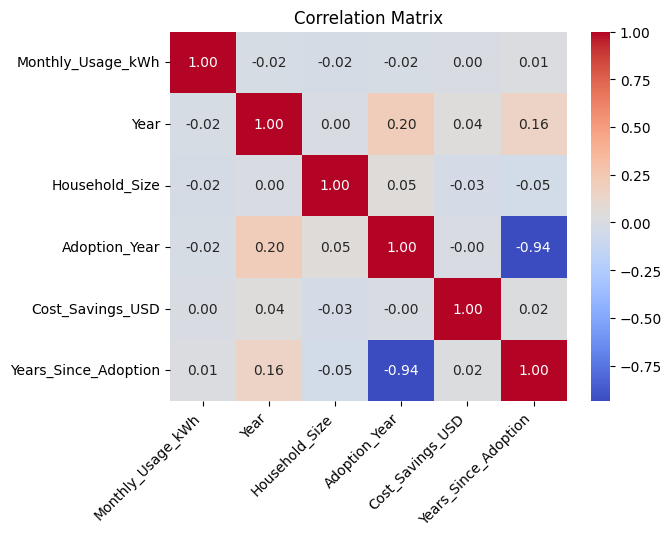

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure()
sns.heatmap(numerical_df.corr(),annot = True, cmap='coolwarm',fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix')
plt.show()

Bonus

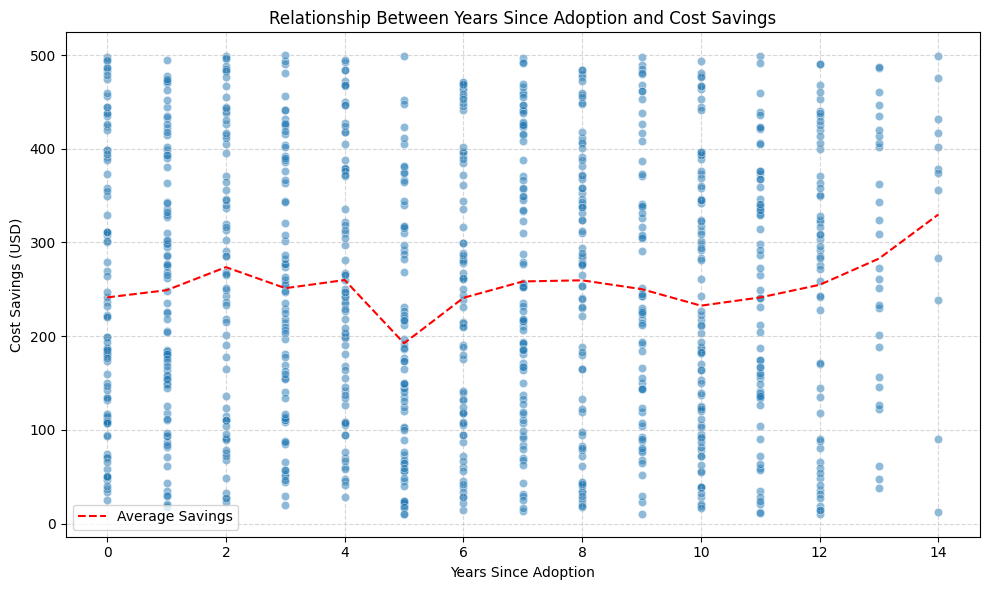

Mô tả Years_Since_Adoption:
 count    1000.000000
mean        6.000000
std         3.938466
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        14.000000
Name: Years_Since_Adoption, dtype: float64
Tương quan giữa Years_Since_Adoption và Cost_Savings_USD: 0.01802285667908811
Các gia đình gắn bó với renewable energy có khoản tiền tiết kiệm nhiều hơn (14 năm)
We can say that renewable energy usage leads to long-term cost savings generally


In [4]:
df['Years_Since_Adoption'] = df['Year'] - df['Adoption_Year']
plt.figure(figsize=(10, 6))
plt.scatter(df['Years_Since_Adoption'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_years_adopted = df.groupby('Years_Since_Adoption')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_years_adopted['Years_Since_Adoption'], avg_savings_by_years_adopted['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Years Since Adoption and Cost Savings')
plt.xlabel('Years Since Adoption')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Mô tả Years_Since_Adoption:\n", df['Years_Since_Adoption'].describe())
print("Tương quan giữa Years_Since_Adoption và Cost_Savings_USD:", df['Years_Since_Adoption'].corr(df['Cost_Savings_USD']))
print("Các gia đình gắn bó với renewable energy có khoản tiền tiết kiệm nhiều hơn (14 năm)")
print("We can say that renewable energy usage leads to long-term cost savings generally")